In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [30]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


مقادیر مهم:
Survived
Embarked
Sex
Age

In [54]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

#میانگین
train['Age'] = train['Age'].fillna(train['Age'].median())

train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

#features and target
X = train.drop('Survived', axis=1)
y = train['Survived']

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy: {:.4f}".format(accuracy))

Validation Accuracy: 0.8045


چک کردن اهمیت ستون های انتخاب شده:

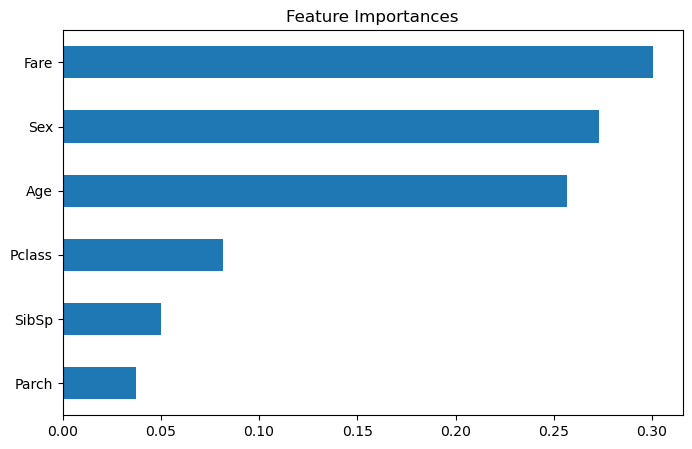

In [63]:
importances = rf_model.feature_importances_
features = X.columns

feat_importances = pd.Series(importances, index=features)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importances")
plt.show()

وارد کردن مقادیر تست کگل:

In [82]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

test['Age'] = test['Age'].fillna(train['Age'].median())
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

X_test_final = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

predictions = rf_model.predict(X_test_final)


In [84]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [86]:
submission.to_csv('submission.csv', index=False)
print("Done")

Done
